### 데이터 로드 및 패키지 설치

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable



In [3]:
# 지도 데이터 분석 라이브러리
import fiona
import geopandas
import shapely.wkt # geometry type으로 변경해주는 라이브러리

# 데이터 분석 라이브러리
import pandas as pd
import numpy as np
import os

# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import style
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 웹크롤링을 위한 라이브러리
import requests
import lxml
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import time

In [4]:
# 지도 데이터 분석 라이브러리
import fiona
import geopandas

# 데이터 분석 라이브러리
import pandas as pd
import numpy as np
import os

# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import style
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

In [5]:
# matplotlib 한글 지원 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [6]:
daegu = geopandas.read_file('./merge_9_daegu.geojson', encoding='utf-8')
daegu = daegu[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]
daegu.head()

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((1098300.00000 1762500.00000, 1098300...",35.861902,128.587298,28.786,124.0,18.0,473.52,9.97,452.73,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((1095800.00000 1760400.00000, 1095800...",35.843036,128.559580,28.763,298.0,47.0,215.99,8.83,213.95,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((1099700.00000 1760500.00000, 1099700...",35.843935,128.602820,28.865,173.0,6.0,263.28,19.39,1323.18,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((1096100.00000 1760200.00000, 1096100...",35.841240,128.562906,28.777,166.0,34.0,201.79,8.20,213.84,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((1099900.00000 1762300.00000, 1099900...",35.860105,128.605038,28.832,438.0,2.0,0.00,54.80,8614.43,0,0,0,0,0,0,0,0,0,0


In [7]:
sejong = geopandas.read_file('./merge_9_sejong.geojson', encoding='utf-8')
sejong = sejong[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]
sejong.head()

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",36.455719,127.251282,24.869,0,1,83.64,0.00,83.64,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",36.533877,127.387655,25.167,0,1,208.91,7.80,198.71,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",36.585083,127.282326,24.825,27,4,99.70,6.43,99.25,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((983800.00000 1830600.00000, 983800.0...",36.473686,127.317805,25.007,0,3,123.00,5.37,277.76,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((969300.00000 1857700.00000, 969300.0...",36.717142,127.157040,24.447,27,20,77.54,8.25,123.95,0,0,0,0,0,0,0,0,0,0


In [8]:
daejeon = geopandas.read_file('./merge_9_daejeon.geojson', encoding='utf-8')
sejong = sejong[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]
sejong.head()

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",36.455719,127.251282,24.869,0,1,83.64,0.00,83.64,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",36.533877,127.387655,25.167,0,1,208.91,7.80,198.71,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",36.585083,127.282326,24.825,27,4,99.70,6.43,99.25,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((983800.00000 1830600.00000, 983800.0...",36.473686,127.317805,25.007,0,3,123.00,5.37,277.76,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((969300.00000 1857700.00000, 969300.0...",36.717142,127.157040,24.447,27,20,77.54,8.25,123.95,0,0,0,0,0,0,0,0,0,0


In [9]:
print('세종 row :', len(sejong))
print('대전 row :',len(daejeon))
print('대구 row :',len(daegu))
print('대전+대구 :', len(daejeon)+len(daegu))

세종 row : 47396
대전 row : 92051
대구 row : 134846
대전+대구 : 226897


In [10]:
print(daejeon.columns)
print(daegu.columns)

Index(['lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수',
       '교육연구시설', '주거지', '농축산업시설', '창고시설', '편의시설', '생산시설', '님비시설', '자동차관련시설',
       'EV', 'geometry'],
      dtype='object')
Index(['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이',
       '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설', '편의시설', '생산시설',
       '님비시설', '자동차관련시설', 'EV'],
      dtype='object')


In [11]:
type(daegu)

geopandas.geodataframe.GeoDataFrame

In [12]:
Daejeon = pd.DataFrame(daejeon)
Daegu = pd.DataFrame(daegu)
DD = pd.concat([Daejeon, Daegu], axis=0)
DD = geopandas.GeoDataFrame(DD)
DD

,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV,geometry
0,36.432362,127.417591,25.355,77.0,8.0,107.63,10.78,1488.43,0,0,0,0,0,0,0,0,0,0,"POLYGON ((992800.00000 1826000.00000, 992800.0..."
1,36.402716,127.423134,25.429,286.0,1.0,0.00,0.00,9653.28,0,0,0,0,0,0,0,0,0,0,"POLYGON ((993300.00000 1822700.00000, 993300.0..."
2,36.445837,127.417591,25.335,81.0,18.0,147.06,7.18,172.82,0,0,0,0,0,0,0,0,0,0,"POLYGON ((992800.00000 1827500.00000, 992800.0..."
3,36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,678.61,0,0,0,0,0,0,0,0,0,0,"POLYGON ((993500.00000 1817300.00000, 993500.0..."
4,36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,7751.35,0,0,0,0,0,0,0,0,0,0,"POLYGON ((993500.00000 1817300.00000, 993500.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134841,35.876276,128.600603,28.793,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,"POLYGON ((1099500.00000 1764100.00000, 1099500..."
134842,35.876276,128.611690,28.819,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,"POLYGON ((1100500.00000 1764100.00000, 1100500..."
134843,35.880768,128.575102,28.726,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,"POLYGON ((1097200.00000 1764600.00000, 1097200..."
134844,35.865495,128.605038,28.822,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,"POLYGON ((1099900.00000 1762900.00000, 1099900..."


In [13]:
DD.columns

Index(['lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수',
       '교육연구시설', '주거지', '농축산업시설', '창고시설', '편의시설', '생산시설', '님비시설', '자동차관련시설',
       'EV', 'geometry'],
      dtype='object')

In [14]:
DD = DD[['geometry','lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수',
       '교육연구시설', '주거지', '농축산업시설', '창고시설', '편의시설', '생산시설', '님비시설', '자동차관련시설',
       'EV']]
DD

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((992800.00000 1826000.00000, 992800.0...",36.432362,127.417591,25.355,77.0,8.0,107.63,10.78,1488.43,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((993300.00000 1822700.00000, 993300.0...",36.402716,127.423134,25.429,286.0,1.0,0.00,0.00,9653.28,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((992800.00000 1827500.00000, 992800.0...",36.445837,127.417591,25.335,81.0,18.0,147.06,7.18,172.82,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,678.61,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,7751.35,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134841,"POLYGON ((1099500.00000 1764100.00000, 1099500...",35.876276,128.600603,28.793,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
134842,"POLYGON ((1100500.00000 1764100.00000, 1100500...",35.876276,128.611690,28.819,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
134843,"POLYGON ((1097200.00000 1764600.00000, 1097200...",35.880768,128.575102,28.726,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
134844,"POLYGON ((1099900.00000 1762900.00000, 1099900...",35.865495,128.605038,28.822,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0


### 학습/테스트 데이터셋 분할, 언더샘플링

In [15]:
train_data = pd.concat([DD[DD.columns[1:-1]], DD[DD.columns[1:-1]]])
train_target = pd.concat([DD[DD.columns[-1]], DD[DD.columns[-1]]])

test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]

In [15]:
train_data

,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설
0,36.432362,127.417591,25.355,77.0,8.0,107.63,10.78,1488.43,0,0,0,0,0,0,0,0,0
1,36.402716,127.423134,25.429,286.0,1.0,0.00,0.00,9653.28,0,0,0,0,0,0,0,0,0
2,36.445837,127.417591,25.335,81.0,18.0,147.06,7.18,172.82,0,0,0,0,0,0,0,0,0
3,36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,678.61,0,0,0,0,0,0,0,0,0
4,36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,7751.35,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134841,35.876276,128.600603,28.793,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0
134842,35.876276,128.611690,28.819,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0
134843,35.880768,128.575102,28.726,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0
134844,35.865495,128.605038,28.822,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0


In [16]:
train_target

0         0
1         0
2         0
3         0
4         0
         ..
134841    0
134842    0
134843    0
134844    0
134845    0
Name: EV, Length: 453794, dtype: int64

In [15]:
print(len(train_target[train_target==0]))
print(len(train_target[train_target==1]))

449874
3920


In [86]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [17]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
train_data, train_target = rus.fit_resample(train_data, train_target)
#train_data = pd.DataFrame(data, columns=data.columns)


In [18]:
print(len(train_target[train_target==0]))
print(len(train_target[train_target==1]))

3920
3920


### 알고리즘 적용

In [25]:
def RandomForest(dists, train_data, train_target, test_data, test_target):
    clf = GridSearchCV(
        ensemble.RandomForestClassifier(),
        param_grid=dists, # 파라미터 입력
        scoring='f1',  # 오차 평가방법
        verbose=1,     # 진행상황
        n_jobs=2
      )

    clf.fit(train_data, train_target)
    
    print()
    print('best_params :', clf.best_params_)
    print('best_score :', clf.best_score_)
    print()
    
    pred = clf.predict(test_data)

    temp = sejong.copy()
    temp['pred'] = [0]*len(temp)
    for i, idx in enumerate(test_data.index):
        temp['pred'][idx] = pred[i]
    #temp['pred'] = pred
        
    print('실제 충전소 수 :', len(temp[temp['EV']==1]))
    print('충전소가 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
    print('recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['EV']==1)]), '/', len(temp[temp['EV']==1]))
    print('최적 입지 후보 :', len(temp[(temp['pred']==1) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    
    idx = temp[(temp['EV'] == 0) & (temp['pred'] == 1)].index
    for i in temp[temp['pred'] == 1].index:
        temp['pred'].loc[i] = 0
    for i in idx:
        temp['pred'].loc[i] = 1

    fig, ax1 = plt.subplots(figsize=(15, 15))
    fig.set_facecolor('white')

    sejong['geometry'].plot(ax=ax1, color='gainsboro')
    sejong[sejong['EV']==1].plot(ax=ax1, column='EV', color='lime', aspect=1)
    temp[temp['pred']==1].plot(ax=ax1, column='pred', color='red', aspect=1)
    ax1.set_axis_off()
    plt.show()

Fitting 5 folds for each of 192 candidates, totalling 960 fits

best_params : {'max_depth': 100, 'max_features': 5, 'n_estimators': 20}
best_score : 0.9554385325923432

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 134
recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 : 4 / 276
최적 입지 후보 : 130 / 47120


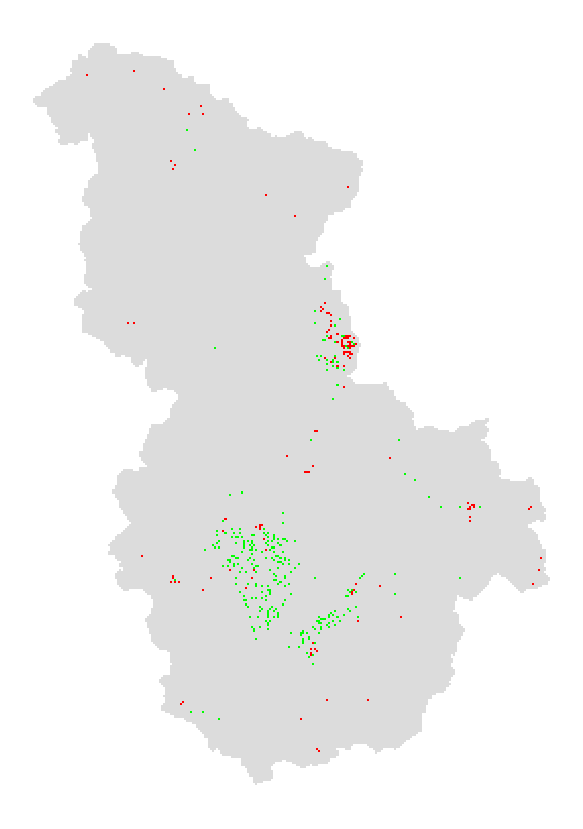

In [28]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,14], 
    'n_estimators' : [10,20,30,50],
    #'class_weight' : [{0:1.3, 1:8.7}]
}

RandomForest(dists, train_data, train_target, test_data, test_target)

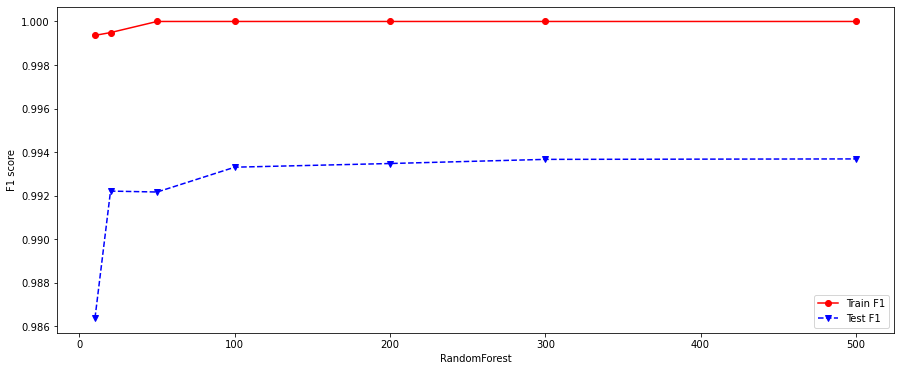

In [31]:
# train_data = pd.concat([DD[DD.columns[1:-1]], DD[DD.columns[1:-1]]])
# train_target = pd.concat([DD[DD.columns[-1]], DD[DD.columns[-1]]])

# test_data = sejong[sejong.columns[1:-1]]
# test_target = sejong[sejong.columns[-1]]


from sklearn import ensemble

trainF1 = []
testF1 = []

X_train, Y_train, X_test, Y_test = train_data, train_target, test_data, test_target

numBaseClassifiers = [10, 20, 50, 100, 200, 300, 500,]
testF1 = []
bestf1 = []

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k) # class_weight={0:1, 1:9}
    clf.fit(train_data, train_target)
    Y_predTrain = clf.predict(train_data)
    Y_predTest = clf.predict(test_data)
    trainF1.append(f1_score(train_target, Y_predTrain, average='micro'))
    testF1.append(f1_score(test_target, Y_predTest, average='micro'))

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, trainF1, 'ro-', numBaseClassifiers, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('RandomForest')
plt.ylabel('F1 score')
plt.show()

In [33]:
df_train = train_data.copy()
df_train['EV'] = train_target
df_train['predTrain'] = Y_predTrain
df_train.head()

print("train_set 에서 충전소가 있는 곳 :", len(df_train[(df_train['EV'] == 1)]))
print("train_set에서 충전소가 없는 곳 :", len(df_train[(df_train['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_train[(df_train['EV'] == 0) & (df_train['predTrain'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_train[(df_train['EV'] == 1) & (df_train['predTrain'] == 0)]))
print()

df_test = test_data.copy()
df_test['EV'] = test_target
df_test['predTest'] = Y_predTest
df_test.head()

print("test_set 에서 충전소가 있는 곳 :", len(df_test[(df_test['EV'] == 1)]))
print("test_set에서 충전소가 없는 곳 :", len(df_test[(df_test['EV'] == 0)]))
print("충전소가 있다고 정확히 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 1)]))
print("충전소가 없는데 있다고 분류 :", len(df_test[(df_test['EV'] == 0) & (df_test['predTest'] == 1)]))
print("충전소가 있는데 없다고 분류 :", len(df_test[(df_test['EV'] == 1) & (df_test['predTest'] == 0)]))

train_set 에서 충전소가 있는 곳 : 3920
train_set에서 충전소가 없는 곳 : 3920
충전소가 있다고 정확히 분류 : 3920
충전소가 없는데 있다고 분류 : 0
충전소가 있는데 없다고 분류 : 0

test_set 에서 충전소가 있는 곳 : 276
test_set에서 충전소가 없는 곳 : 47120
충전소가 있다고 정확히 분류 : 2
충전소가 없는데 있다고 분류 : 25
충전소가 있는데 없다고 분류 : 274


### 정규화

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sejong_minmax = scaler.fit_transform(sejong[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
sejong_minmax = pd.DataFrame(sejong_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
sejong[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = sejong_minmax

sejong.head()

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",36.455719,127.251282,0.551724,0.00000,0.014706,0.090746,0.000000,0.000854,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",36.533877,127.387655,0.894253,0.00000,0.014706,0.226660,0.064580,0.002029,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",36.585083,127.282326,0.501149,0.01176,0.058824,0.108171,0.053237,0.001014,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((983800.00000 1830600.00000, 983800.0...",36.473686,127.317805,0.710345,0.00000,0.044118,0.133451,0.044461,0.002836,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((969300.00000 1857700.00000, 969300.0...",36.717142,127.157040,0.066667,0.01176,0.294118,0.084128,0.068306,0.001266,0,0,0,0,0,0,0,0,0,0


In [22]:
DD_minmax = scaler.fit_transform(DD[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
DD_minmax = pd.DataFrame(DD_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
DD[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = DD_minmax

In [23]:
train_data = pd.concat([DD[DD.columns[1:-1]], DD[DD.columns[1:-1]]])
train_target = pd.concat([DD[DD.columns[-1]], DD[DD.columns[-1]]])

test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]

Fitting 5 folds for each of 192 candidates, totalling 960 fits

best_params : {'max_depth': 100, 'max_features': 14, 'n_estimators': 50}
best_score : 0.996025056653506

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 33879
recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 : 98 / 276
최적 입지 후보 : 33781 / 47120


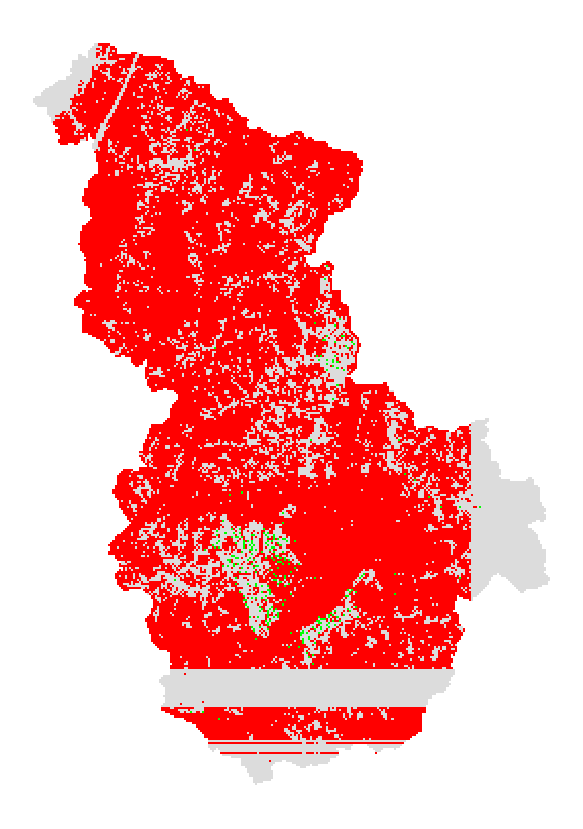

In [26]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,14], 
    'n_estimators' : [10,20,30,50],
    #'class_weight' : [{0:1.3, 1:8.7}]
}

RandomForest(dists, train_data, train_target, test_data, test_target)

### 오버샘플링

In [34]:
train_data = pd.concat([DD[DD.columns[1:-1]], DD[DD.columns[1:-1]]])
train_target = pd.concat([DD[DD.columns[-1]], DD[DD.columns[-1]]])

test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]

Fitting 5 folds for each of 192 candidates, totalling 960 fits

best_params : {'max_depth': 50, 'max_features': 7, 'n_estimators': 50}
best_score : 0.994996440859332

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 0
recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 : 0 / 276
최적 입지 후보 : 0 / 47120


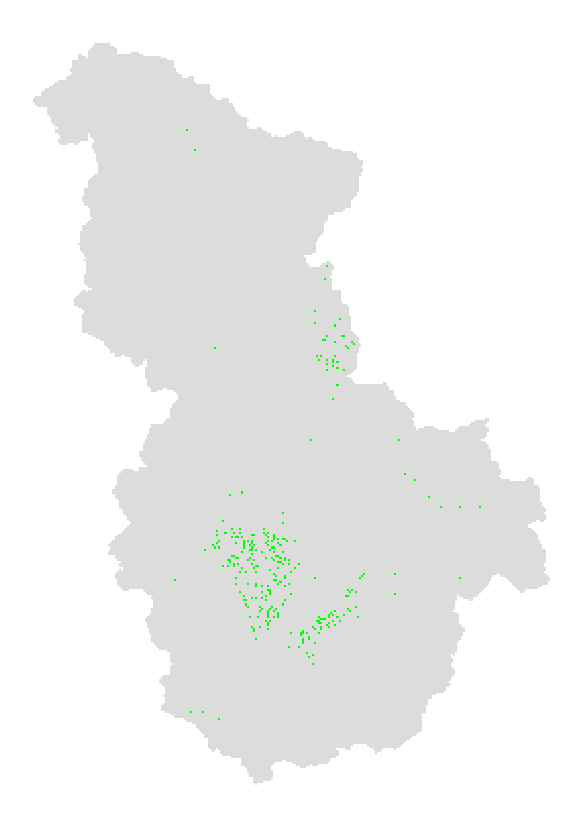

In [35]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,14], 
    'n_estimators' : [10,20,30,50],
    #'class_weight' : [{0:1.3, 1:8.7}]
}

RandomForest(dists, train_data, train_target, test_data, test_target)

### 인구수!=0

In [27]:
DD

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((992800.00000 1826000.00000, 992800.0...",36.432362,127.417591,0.088283,0.014920,0.032653,0.014203,0.050546,0.005408,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((993300.00000 1822700.00000, 993300.0...",36.402716,127.423134,0.105385,0.055416,0.004082,0.000000,0.000000,0.035071,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((992800.00000 1827500.00000, 992800.0...",36.445837,127.417591,0.083661,0.015695,0.073469,0.019406,0.033666,0.000628,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,0.122024,0.006200,0.012245,0.021187,0.068223,0.002465,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,0.122024,0.006200,0.012245,0.021187,0.068223,0.028161,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134841,"POLYGON ((1099500.00000 1764100.00000, 1099500...",35.876276,128.600603,0.954703,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0
134842,"POLYGON ((1100500.00000 1764100.00000, 1100500...",35.876276,128.611690,0.899700,0.000000,0.012245,0.005978,0.018756,0.000257,0,0,0,0,0,0,0,0,0,0
134843,"POLYGON ((1097200.00000 1764600.00000, 1097200...",35.880768,128.575102,0.971112,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0
134844,"POLYGON ((1099900.00000 1762900.00000, 1099900...",35.865495,128.605038,0.942685,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0


In [50]:
DD_test_cut = (DD.인구수!=0)&(DD.건축물수!=0)
DD_cut = DD[DD_test_cut].reset_index(drop=True)
DD_cut

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((992800.00000 1826000.00000, 992800.0...",36.432362,127.417591,25.355,77.0,8.0,107.63,10.78,1488.43,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((993300.00000 1822700.00000, 993300.0...",36.402716,127.423134,25.429,286.0,1.0,0.00,0.00,9653.28,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((992800.00000 1827500.00000, 992800.0...",36.445837,127.417591,25.335,81.0,18.0,147.06,7.18,172.82,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,678.61,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,7751.35,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30177,"POLYGON ((1098300.00000 1763300.00000, 1098300...",35.869089,128.587298,28.773,49.0,26.0,123.52,8.51,257.49,0,0,0,0,0,5,1,0,0,0
30178,"POLYGON ((1099000.00000 1764700.00000, 1099000...",35.881666,128.595059,28.773,30.0,42.0,78.57,9.81,231.39,0,0,0,0,0,0,0,0,0,0
30179,"POLYGON ((1097900.00000 1764400.00000, 1097900...",35.878971,128.582863,28.746,146.0,31.0,190.34,11.40,347.25,0,0,0,0,0,0,0,0,0,0
30180,"POLYGON ((1098400.00000 1763300.00000, 1098400...",35.869089,128.588407,28.776,41.0,26.0,56.29,14.15,679.90,0,0,0,0,0,3,1,0,0,0


In [51]:
train_data = pd.concat([DD_cut[DD_cut.columns[1:-1]], DD_cut[DD_cut.columns[1:-1]]])
train_target = pd.concat([DD_cut[DD_cut.columns[-1]], DD_cut[DD_cut.columns[-1]]])

test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]  #sejong_cut

In [52]:
train_data_rus, train_target_rus = train_data, train_target

In [53]:
def RandomForest(dists, train_data, train_target, test_data, test_target, threshold):
    
    trainF1 = []
    testF1 = []
    sketch_trainF1 = []
    sketch_testF1 = []
    param = []
    
    for estimators in dists['max_depth']:
        testf1indepth = []
        trainf1indepth = []
        for depth in dists['n_estimators']:
            for features in dists['max_features']:
                clf = ensemble.RandomForestClassifier(n_estimators=estimators, max_depth=depth, max_features=features, n_jobs=2)
                clf.fit(train_data, train_target)
                
                Y_predproba_train = clf.predict_proba(train_data)
                Y_predproba_test = clf.predict_proba(test_data)
                
                Y_predTrain = (Y_predproba_train [:,1] >= threshold).astype('int')
                Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')
                
                param.append([estimators, depth, features])
                trainF1.append(f1_score(train_target, Y_predTrain, average='micro'))
                testF1.append(f1_score(test_target, Y_predTest, average='micro'))
                testf1indepth.append(f1_score(test_target, Y_predTest, average='micro'))
                trainf1indepth.append(f1_score(train_target, Y_predTrain, average='micro'))
        
        sketch_trainF1.append(max(trainf1indepth))
        sketch_testF1.append(max(testf1indepth))
                    
    best_params = param[testF1.index(max(testF1))]
    print()
    print('best_params (test 성능이 가장 좋은 파라미터) : ', 'n_estimators=', best_params[0], 'max_depth=', best_params[1], 'max_features=', best_params[2])
    print('best_score (test F1 score):', max(testF1))
    print()

    # F1 score 비교
    plt.figure(figsize=(15, 6))
    plt.plot(dists['max_depth'], sketch_trainF1, 'ro-', dists['max_depth'], sketch_testF1, 'bv--')
    plt.legend(['Train F1', 'Test F1'])
    plt.xlabel('estimators')
    plt.ylabel('F1 score')
    plt.show()
    
    # 최적의 파라미터를 입력해 모델을 생성
    clf = ensemble.RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], max_features=best_params[2], n_jobs=2)
    clf.fit(train_data, train_target)
    Y_predproba_test = clf.predict_proba(test_data)
    Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')

    # 지도 그리기
    temp = sejong.copy()
    temp['pred'] = [0]*len(temp)
    for i, idx in enumerate(test_data.index):
        temp['pred'][idx] = Y_predTest[i]
    #temp['pred'] = pred
        
    print('실제 충전소 수 :', len(temp[temp['EV']==1]))
    print('충전소가 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
    print('recall score 실제 충전소가 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['EV']==1)]), '/', len(temp[temp['EV']==1]))
    print('precision score 실제 충전소가 없는 곳을 맞춘 경우 :', len(temp[(temp['pred']==0) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    print('최적 입지 후보(실제론 없지만, 있어야 한다고 분류) :', len(temp[(temp['pred']==1) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    
    # feature inportance
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    clf_importances = pd.Series(importances, index=test_data.columns)

    fig, ax = plt.subplots()
    clf_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    idx = temp[(temp['EV'] == 0) & (temp['pred'] == 1)].index
    for i in temp[temp['pred'] == 1].index:
        temp['pred'].loc[i] = 0
    for i in idx:
        temp['pred'].loc[i] = 1

    fig, ax1 = plt.subplots(figsize=(15, 15))
    fig.set_facecolor('white')
    sejong['geometry'].plot(ax=ax1, color='gainsboro')
    sejong[sejong['EV']==1].plot(ax=ax1, column='EV', color='lime', aspect=1)
    temp[temp['pred']==1].plot(ax=ax1, column='pred', color='red', aspect=1)
    ax1.set_axis_off()
    plt.show()
    
    return clf, temp


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 10 max_features= 16
best_score (test F1 score): 0.9940923284665373



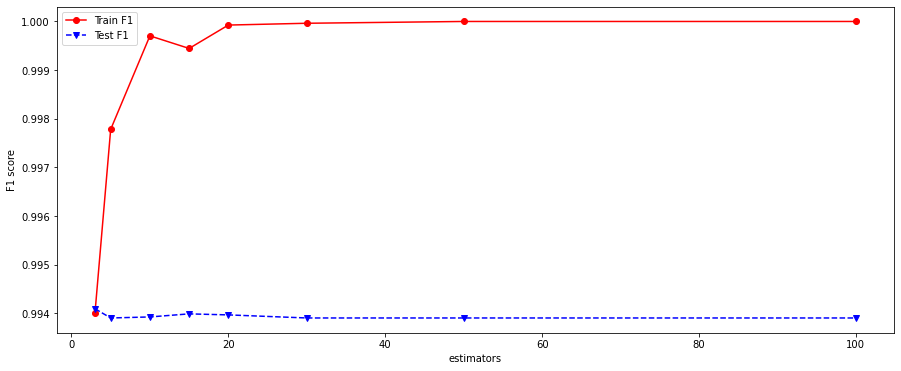

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 16
recall score 실제 충전소가 맞는 지 맞춘 경우 : 0 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47104 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 16 / 47120


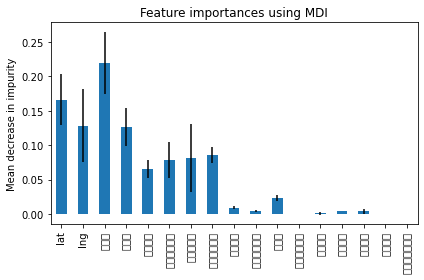

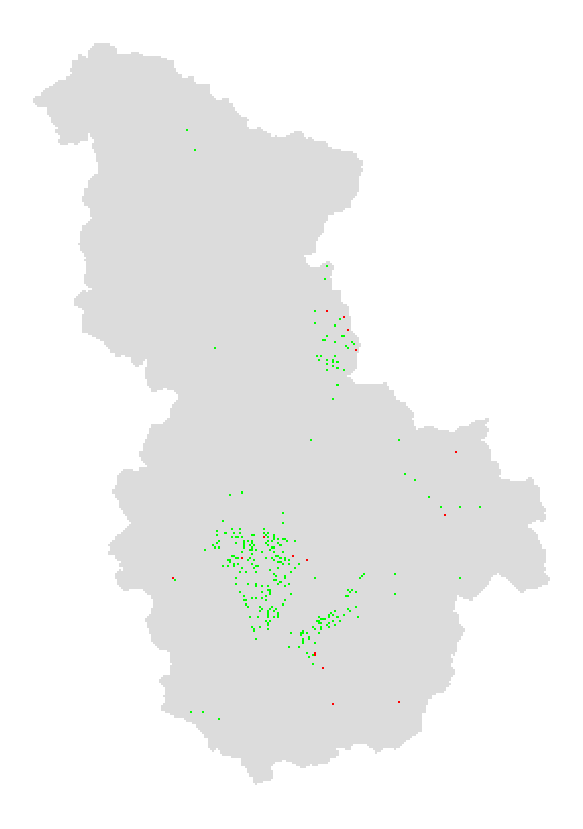

In [49]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

threshold = 0.7
clf, rus_df = RandomForest(dists, train_data_rus, train_target_rus, test_data, test_target, threshold)

#### 인구수 = 0

In [54]:
DD_test_cut = (DD.인구수!=0) #&(DD.건축물수!=0)
DD_cut = DD[DD_test_cut].reset_index(drop=True)
DD_cut

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((992800.00000 1826000.00000, 992800.0...",36.432362,127.417591,25.355,77.0,8.0,107.63,10.78,1488.43,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((993300.00000 1822700.00000, 993300.0...",36.402716,127.423134,25.429,286.0,1.0,0.00,0.00,9653.28,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((992800.00000 1827500.00000, 992800.0...",36.445837,127.417591,25.335,81.0,18.0,147.06,7.18,172.82,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,678.61,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,7751.35,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30177,"POLYGON ((1098300.00000 1763300.00000, 1098300...",35.869089,128.587298,28.773,49.0,26.0,123.52,8.51,257.49,0,0,0,0,0,5,1,0,0,0
30178,"POLYGON ((1099000.00000 1764700.00000, 1099000...",35.881666,128.595059,28.773,30.0,42.0,78.57,9.81,231.39,0,0,0,0,0,0,0,0,0,0
30179,"POLYGON ((1097900.00000 1764400.00000, 1097900...",35.878971,128.582863,28.746,146.0,31.0,190.34,11.40,347.25,0,0,0,0,0,0,0,0,0,0
30180,"POLYGON ((1098400.00000 1763300.00000, 1098400...",35.869089,128.588407,28.776,41.0,26.0,56.29,14.15,679.90,0,0,0,0,0,3,1,0,0,0


In [55]:
train_data = pd.concat([DD_cut[DD_cut.columns[1:-1]], DD_cut[DD_cut.columns[1:-1]]])
train_target = pd.concat([DD_cut[DD_cut.columns[-1]], DD_cut[DD_cut.columns[-1]]])

test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]  #sejong_cut

In [56]:
train_data_rus, train_target_rus = train_data, train_target

In [57]:
def RandomForest(dists, train_data, train_target, test_data, test_target, threshold):
    
    trainF1 = []
    testF1 = []
    sketch_trainF1 = []
    sketch_testF1 = []
    param = []
    
    for estimators in dists['max_depth']:
        testf1indepth = []
        trainf1indepth = []
        for depth in dists['n_estimators']:
            for features in dists['max_features']:
                clf = ensemble.RandomForestClassifier(n_estimators=estimators, max_depth=depth, max_features=features, n_jobs=2)
                clf.fit(train_data, train_target)
                
                Y_predproba_train = clf.predict_proba(train_data)
                Y_predproba_test = clf.predict_proba(test_data)
                
                Y_predTrain = (Y_predproba_train [:,1] >= threshold).astype('int')
                Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')
                
                param.append([estimators, depth, features])
                trainF1.append(f1_score(train_target, Y_predTrain, average='micro'))
                testF1.append(f1_score(test_target, Y_predTest, average='micro'))
                testf1indepth.append(f1_score(test_target, Y_predTest, average='micro'))
                trainf1indepth.append(f1_score(train_target, Y_predTrain, average='micro'))
        
        sketch_trainF1.append(max(trainf1indepth))
        sketch_testF1.append(max(testf1indepth))
                    
    best_params = param[testF1.index(max(testF1))]
    print()
    print('best_params (test 성능이 가장 좋은 파라미터) : ', 'n_estimators=', best_params[0], 'max_depth=', best_params[1], 'max_features=', best_params[2])
    print('best_score (test F1 score):', max(testF1))
    print()

    # F1 score 비교
    plt.figure(figsize=(15, 6))
    plt.plot(dists['max_depth'], sketch_trainF1, 'ro-', dists['max_depth'], sketch_testF1, 'bv--')
    plt.legend(['Train F1', 'Test F1'])
    plt.xlabel('estimators')
    plt.ylabel('F1 score')
    plt.show()
    
    # 최적의 파라미터를 입력해 모델을 생성
    clf = ensemble.RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], max_features=best_params[2], n_jobs=2)
    clf.fit(train_data, train_target)
    Y_predproba_test = clf.predict_proba(test_data)
    Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')

    # 지도 그리기
    temp = sejong.copy()
    temp['pred'] = [0]*len(temp)
    for i, idx in enumerate(test_data.index):
        temp['pred'][idx] = Y_predTest[i]
    #temp['pred'] = pred
        
    print('실제 충전소 수 :', len(temp[temp['EV']==1]))
    print('충전소가 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
    print('recall score 실제 충전소가 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['EV']==1)]), '/', len(temp[temp['EV']==1]))
    print('precision score 실제 충전소가 없는 곳을 맞춘 경우 :', len(temp[(temp['pred']==0) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    print('최적 입지 후보(실제론 없지만, 있어야 한다고 분류) :', len(temp[(temp['pred']==1) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    
    # feature inportance
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    clf_importances = pd.Series(importances, index=test_data.columns)

    fig, ax = plt.subplots()
    clf_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    idx = temp[(temp['EV'] == 0) & (temp['pred'] == 1)].index
    for i in temp[temp['pred'] == 1].index:
        temp['pred'].loc[i] = 0
    for i in idx:
        temp['pred'].loc[i] = 1

    fig, ax1 = plt.subplots(figsize=(15, 15))
    fig.set_facecolor('white')
    sejong['geometry'].plot(ax=ax1, color='gainsboro')
    sejong[sejong['EV']==1].plot(ax=ax1, column='EV', color='lime', aspect=1)
    temp[temp['pred']==1].plot(ax=ax1, column='pred', color='red', aspect=1)
    ax1.set_axis_off()
    plt.show()
    
    return clf, temp


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 100 max_features= 16
best_score (test F1 score): 0.9941767237741581



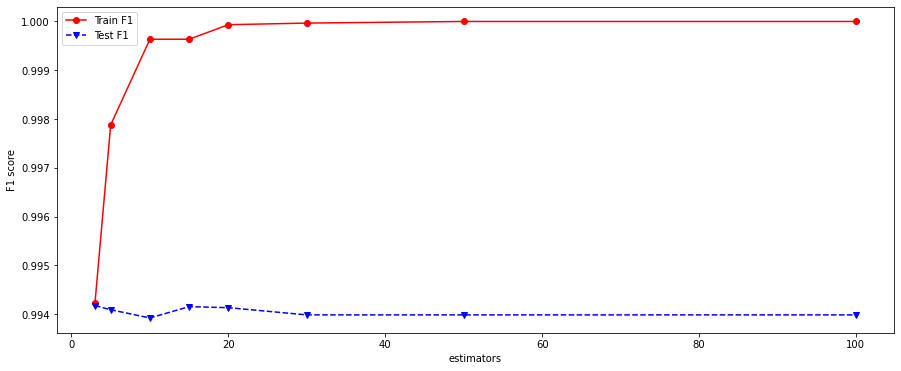

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 8
recall score 실제 충전소가 맞는 지 맞춘 경우 : 2 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47114 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 6 / 47120


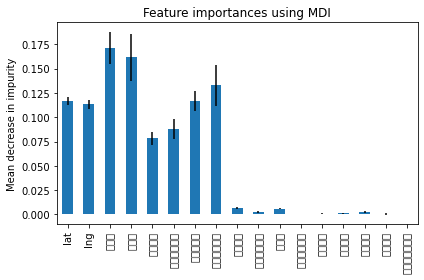

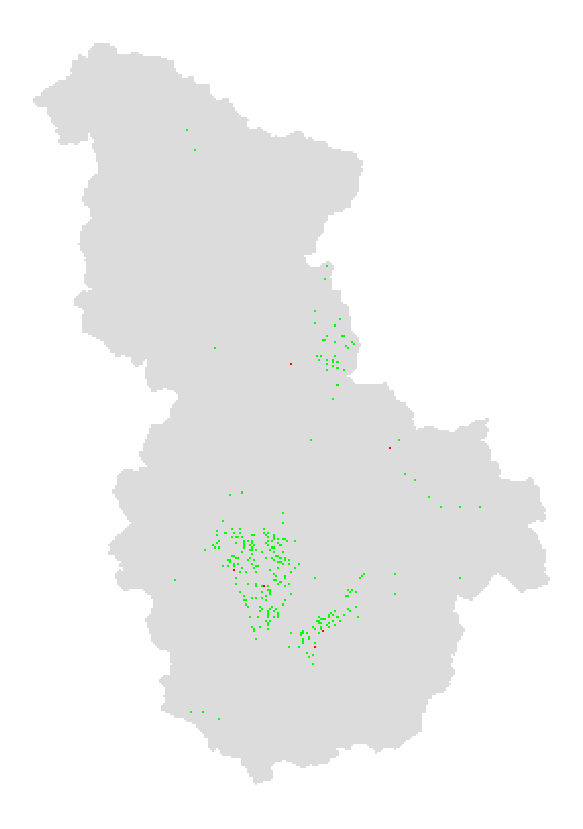

In [58]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

threshold = 0.7
clf, rus_df = RandomForest(dists, train_data_rus, train_target_rus, test_data, test_target, threshold)

#### 인구수&EV = 0

In [63]:
DD_cut1 = DD.drop(DD[(DD['인구수']==0) & (DD['EV']==0)].index)
DD_cut1

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((992800.00000 1826000.00000, 992800.0...",36.432362,127.417591,25.355,77.0,8.0,107.63,10.78,1488.43,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((993300.00000 1822700.00000, 993300.0...",36.402716,127.423134,25.429,286.0,1.0,0.00,0.00,9653.28,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((992800.00000 1827500.00000, 992800.0...",36.445837,127.417591,25.335,81.0,18.0,147.06,7.18,172.82,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,678.61,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,7751.35,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134753,"POLYGON ((1098300.00000 1763300.00000, 1098300...",35.869089,128.587298,28.773,49.0,26.0,123.52,8.51,257.49,0,0,0,0,0,5,1,0,0,0
134754,"POLYGON ((1099000.00000 1764700.00000, 1099000...",35.881666,128.595059,28.773,30.0,42.0,78.57,9.81,231.39,0,0,0,0,0,0,0,0,0,0
134755,"POLYGON ((1097900.00000 1764400.00000, 1097900...",35.878971,128.582863,28.746,146.0,31.0,190.34,11.40,347.25,0,0,0,0,0,0,0,0,0,0
134756,"POLYGON ((1098400.00000 1763300.00000, 1098400...",35.869089,128.588407,28.776,41.0,26.0,56.29,14.15,679.90,0,0,0,0,0,3,1,0,0,0


In [64]:
train_data = pd.concat([DD_cut1[DD_cut1.columns[1:-1]], DD_cut1[DD_cut1.columns[1:-1]]])
train_target = pd.concat([DD_cut1[DD_cut1.columns[-1]], DD_cut1[DD_cut1.columns[-1]]])

test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]  #sejong_cut

In [65]:
def RandomForest(dists, train_data, train_target, test_data, test_target, threshold):
    
    trainF1 = []
    testF1 = []
    sketch_trainF1 = []
    sketch_testF1 = []
    param = []
    
    for estimators in dists['max_depth']:
        testf1indepth = []
        trainf1indepth = []
        for depth in dists['n_estimators']:
            for features in dists['max_features']:
                clf = ensemble.RandomForestClassifier(n_estimators=estimators, max_depth=depth, max_features=features, n_jobs=2)
                clf.fit(train_data, train_target)
                
                Y_predproba_train = clf.predict_proba(train_data)
                Y_predproba_test = clf.predict_proba(test_data)
                
                Y_predTrain = (Y_predproba_train [:,1] >= threshold).astype('int')
                Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')
                
                param.append([estimators, depth, features])
                trainF1.append(f1_score(train_target, Y_predTrain, average='micro'))
                testF1.append(f1_score(test_target, Y_predTest, average='micro'))
                testf1indepth.append(f1_score(test_target, Y_predTest, average='micro'))
                trainf1indepth.append(f1_score(train_target, Y_predTrain, average='micro'))
        
        sketch_trainF1.append(max(trainf1indepth))
        sketch_testF1.append(max(testf1indepth))
                    
    best_params = param[testF1.index(max(testF1))]
    print()
    print('best_params (test 성능이 가장 좋은 파라미터) : ', 'n_estimators=', best_params[0], 'max_depth=', best_params[1], 'max_features=', best_params[2])
    print('best_score (test F1 score):', max(testF1))
    print()

    # F1 score 비교
    plt.figure(figsize=(15, 6))
    plt.plot(dists['max_depth'], sketch_trainF1, 'ro-', dists['max_depth'], sketch_testF1, 'bv--')
    plt.legend(['Train F1', 'Test F1'])
    plt.xlabel('estimators')
    plt.ylabel('F1 score')
    plt.show()
    
    # 최적의 파라미터를 입력해 모델을 생성
    clf = ensemble.RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], max_features=best_params[2], n_jobs=2)
    clf.fit(train_data, train_target)
    Y_predproba_test = clf.predict_proba(test_data)
    Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')

    # 지도 그리기
    temp = sejong.copy()
    temp['pred'] = [0]*len(temp)
    for i, idx in enumerate(test_data.index):
        temp['pred'][idx] = Y_predTest[i]
    #temp['pred'] = pred
        
    print('실제 충전소 수 :', len(temp[temp['EV']==1]))
    print('충전소가 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
    print('recall score 실제 충전소가 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['EV']==1)]), '/', len(temp[temp['EV']==1]))
    print('precision score 실제 충전소가 없는 곳을 맞춘 경우 :', len(temp[(temp['pred']==0) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    print('최적 입지 후보(실제론 없지만, 있어야 한다고 분류) :', len(temp[(temp['pred']==1) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    
    # feature inportance
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    clf_importances = pd.Series(importances, index=test_data.columns)

    fig, ax = plt.subplots()
    clf_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    idx = temp[(temp['EV'] == 0) & (temp['pred'] == 1)].index
    for i in temp[temp['pred'] == 1].index:
        temp['pred'].loc[i] = 0
    for i in idx:
        temp['pred'].loc[i] = 1

    fig, ax1 = plt.subplots(figsize=(15, 15))
    fig.set_facecolor('white')
    sejong['geometry'].plot(ax=ax1, color='gainsboro')
    sejong[sejong['EV']==1].plot(ax=ax1, column='EV', color='lime', aspect=1)
    temp[temp['pred']==1].plot(ax=ax1, column='pred', color='red', aspect=1)
    ax1.set_axis_off()
    plt.show()
    
    return clf, temp


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 100 max_features= 16
best_score (test F1 score): 0.06840239682673643



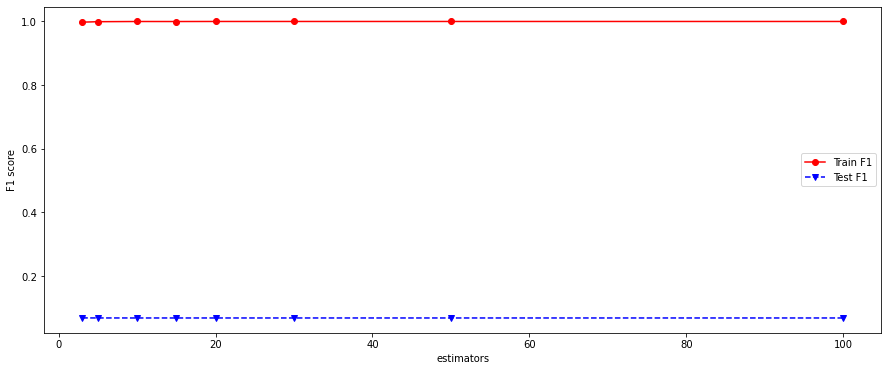

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 44274
recall score 실제 충전소가 맞는 지 맞춘 경우 : 128 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 2974 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 44146 / 47120


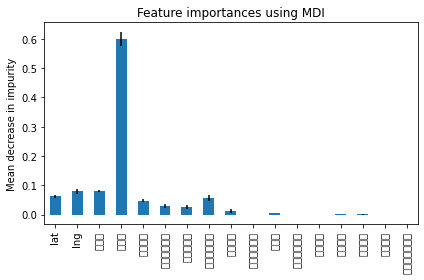

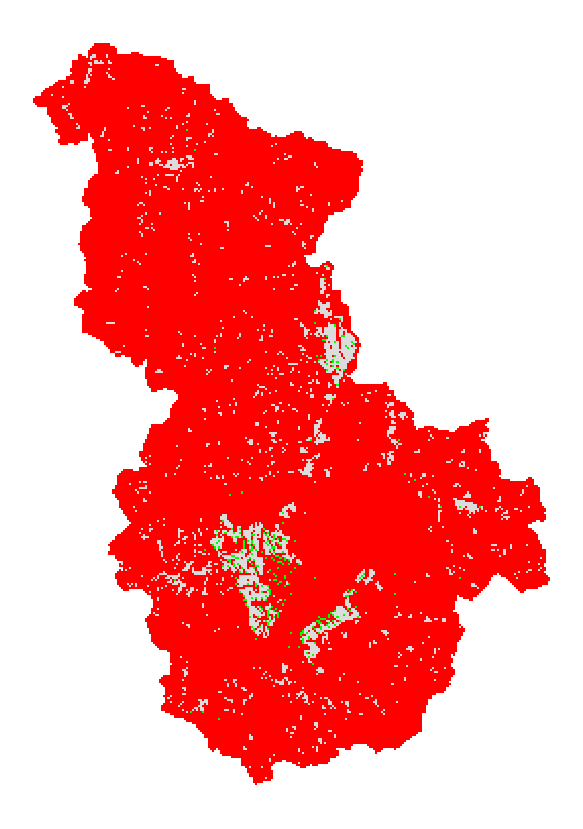

In [66]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

threshold = 0.7
clf, rus_df = RandomForest(dists, train_data, train_target, test_data, test_target, threshold)

### 인구수가 0인데 EV가 1인곳

In [75]:
condition = (DD.인구수==0)&(DD.EV==1)
TL = DD[condition].reset_index(drop=True)
TL = TL[['고저차', '인구수', '건축물수', '주거용도면적', '건축물높이',
       '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설', '편의시설', '생산시설',
       '님비시설', '자동차관련시설', 'EV']]
TL

,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,25.568,0.0,2.0,0.00,6.28,234.30,0,0,0,0,0,0,0,0,0,1
1,25.568,0.0,2.0,0.00,6.28,266.86,0,0,0,0,0,0,0,0,0,1
2,25.568,0.0,2.0,0.00,9.78,234.30,0,0,0,0,0,0,0,0,0,1
3,25.568,0.0,2.0,0.00,9.78,266.86,0,0,0,0,0,0,0,0,0,1
4,25.568,0.0,2.0,140.59,6.28,234.30,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,28.940,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,1
1201,29.007,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,1
1202,28.963,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,1
1203,28.942,0.0,0.0,95.00,0.00,0.00,0,0,0,0,0,0,0,0,0,1


In [81]:
DD[['고저차', '인구수', '건축물수', '주거용도면적', '건축물높이',
       '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설', '편의시설', '생산시설',
       '님비시설', '자동차관련시설', 'EV']][DD['인구수']==0].corr()

,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
인구수,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
건축물수,NaN,1.000000,0.226950,0.259974,0.060407,0.025276,0.006874,0.010809,-0.003787,0.011707,0.020109,0.012222,0.002600,-0.001258,0.008720
주거용도면적,NaN,0.226950,1.000000,0.221213,0.037779,0.017542,-0.001487,0.015810,-0.004844,0.015641,0.013269,0.025128,-0.004085,-0.003606,0.022282
건축물높이,NaN,0.259974,0.221213,1.000000,0.411549,0.015352,0.024722,0.018017,-0.004568,0.010898,0.035874,0.025195,0.014766,-0.003184,0.027543
건축물연면적,NaN,0.060407,0.037779,0.411549,1.000000,0.010885,0.003729,0.005676,-0.002302,0.020102,0.016634,0.007657,0.001948,-0.001365,0.018060
주차장수,NaN,0.025276,0.017542,0.015352,0.010885,1.000000,-0.000616,0.000292,-0.001111,-0.001207,-0.001736,0.016506,-0.000940,-0.000702,0.032976
교육연구시설,NaN,0.006874,-0.001487,0.024722,0.003729,-0.000616,1.000000,0.281820,0.002328,0.004350,0.153728,-0.000266,0.329964,0.004696,-0.000088
주거지,NaN,0.010809,0.015810,0.018017,0.005676,0.000292,0.281820,1.000000,0.266852,0.172934,0.289285,0.020367,0.110663,0.077358,0.037581
농축산업시설,NaN,-0.003787,-0.004844,-0.004568,-0.002302,-0.001111,0.002328,0.266852,1.000000,0.018433,0.010256,-0.000481,-0.000765,-0.000571,-0.002360
창고시설,NaN,0.011707,0.015641,0.010898,0.020102,-0.001207,0.004350,0.172934,0.018433,1.000000,0.075200,0.015440,-0.000831,-0.000621,0.051029


In [82]:
DD[['고저차', '인구수', '건축물수', '주거용도면적', '건축물높이',
       '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설', '편의시설', '생산시설',
       '님비시설', '자동차관련시설', 'EV']].corr()

,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
인구수,1.000000,0.327736,0.251644,0.611870,0.429368,0.031873,0.002516,0.006257,-0.006151,0.000803,0.011116,0.002958,-0.002188,-0.003027,0.047812
건축물수,0.327736,1.000000,0.450628,0.264363,0.039329,0.032698,0.002450,0.017428,-0.006884,0.008217,0.033954,0.017181,-0.000909,-0.002147,0.036731
주거용도면적,0.251644,0.450628,1.000000,0.265676,0.036572,0.022361,0.001234,0.017180,-0.006560,0.009385,0.014684,0.026067,-0.003841,-0.004600,0.050988
건축물높이,0.611870,0.264363,0.265676,1.000000,0.562212,0.017278,0.014058,0.015007,-0.006814,0.006065,0.024607,0.016415,0.005002,-0.004561,0.057492
건축물연면적,0.429368,0.039329,0.036572,0.562212,1.000000,0.014427,0.005165,0.005807,-0.003637,0.010726,0.013795,0.005159,0.000290,-0.002401,0.032781
주차장수,0.031873,0.032698,0.022361,0.017278,0.014427,1.000000,-0.000797,0.001038,-0.001251,-0.001419,0.000128,0.012399,-0.001075,-0.000795,0.043777
교육연구시설,0.002516,0.002450,0.001234,0.014058,0.005165,-0.000797,1.000000,0.244995,0.007488,0.007320,0.130647,0.011341,0.310686,0.009038,0.003820
주거지,0.006257,0.017428,0.017180,0.015007,0.005807,0.001038,0.244995,1.000000,0.235635,0.157584,0.282311,0.028585,0.102367,0.068263,0.036491
농축산업시설,-0.006151,-0.006884,-0.006560,-0.006814,-0.003637,-0.001251,0.007488,0.235635,1.000000,0.018330,0.010059,-0.000583,-0.000703,-0.000520,-0.002670
창고시설,0.000803,0.008217,0.009385,0.006065,0.010726,-0.001419,0.007320,0.157584,0.018330,1.000000,0.084853,0.024682,-0.000798,-0.000590,0.033476


#### 인구수, 주거용도면적 ==0 / 언더샘플링

In [83]:
DD_cut2 = DD.drop(DD[(DD['인구수']==0) & (DD['주거용도면적']==0)].index)
DD_cut2

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((992800.00000 1826000.00000, 992800.0...",36.432362,127.417591,25.355,77.0,8.0,107.63,10.78,1488.43,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((993300.00000 1822700.00000, 993300.0...",36.402716,127.423134,25.429,286.0,1.0,0.00,0.00,9653.28,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((992800.00000 1827500.00000, 992800.0...",36.445837,127.417591,25.335,81.0,18.0,147.06,7.18,172.82,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,678.61,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,7751.35,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134797,"POLYGON ((1099400.00000 1764400.00000, 1099400...",35.878971,128.599494,28.787,0.0,10.0,151.05,10.31,389.99,1,0,0,0,0,0,0,0,0,0
134805,"POLYGON ((1098200.00000 1764900.00000, 1098200...",35.883463,128.586189,28.750,0.0,0.0,144.15,0.00,0.00,0,0,0,0,0,0,0,0,0,0
134822,"POLYGON ((1097500.00000 1764000.00000, 1097500...",35.875377,128.578428,28.741,0.0,21.0,69.62,8.21,953.78,0,0,0,0,0,0,0,0,0,0
134835,"POLYGON ((1099300.00000 1764000.00000, 1099300...",35.875377,128.598385,28.789,0.0,3.0,46.26,33.00,2618.67,0,0,0,0,0,1,0,0,0,0


In [87]:
train_data = pd.concat([DD_cut2[DD_cut2.columns[1:-1]], DD_cut2[DD_cut2.columns[1:-1]]])
train_target = pd.concat([DD_cut2[DD_cut2.columns[-1]], DD_cut2[DD_cut2.columns[-1]]])

test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]  #sejong_cut

In [88]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
train_data, train_target = rus.fit_resample(train_data, train_target)
#train_data = pd.DataFrame(data, columns=data.columns)

In [89]:
def RandomForest(dists, train_data, train_target, test_data, test_target, threshold):
    
    trainF1 = []
    testF1 = []
    sketch_trainF1 = []
    sketch_testF1 = []
    param = []
    
    for estimators in dists['max_depth']:
        testf1indepth = []
        trainf1indepth = []
        for depth in dists['n_estimators']:
            for features in dists['max_features']:
                clf = ensemble.RandomForestClassifier(n_estimators=estimators, max_depth=depth, max_features=features, n_jobs=2)
                clf.fit(train_data, train_target)
                
                Y_predproba_train = clf.predict_proba(train_data)
                Y_predproba_test = clf.predict_proba(test_data)
                
                Y_predTrain = (Y_predproba_train [:,1] >= threshold).astype('int')
                Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')
                
                param.append([estimators, depth, features])
                trainF1.append(f1_score(train_target, Y_predTrain, average='micro'))
                testF1.append(f1_score(test_target, Y_predTest, average='micro'))
                testf1indepth.append(f1_score(test_target, Y_predTest, average='micro'))
                trainf1indepth.append(f1_score(train_target, Y_predTrain, average='micro'))
        
        sketch_trainF1.append(max(trainf1indepth))
        sketch_testF1.append(max(testf1indepth))
                    
    best_params = param[testF1.index(max(testF1))]
    print()
    print('best_params (test 성능이 가장 좋은 파라미터) : ', 'n_estimators=', best_params[0], 'max_depth=', best_params[1], 'max_features=', best_params[2])
    print('best_score (test F1 score):', max(testF1))
    print()

    # F1 score 비교
    plt.figure(figsize=(15, 6))
    plt.plot(dists['max_depth'], sketch_trainF1, 'ro-', dists['max_depth'], sketch_testF1, 'bv--')
    plt.legend(['Train F1', 'Test F1'])
    plt.xlabel('estimators')
    plt.ylabel('F1 score')
    plt.show()
    
    # 최적의 파라미터를 입력해 모델을 생성
    clf = ensemble.RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], max_features=best_params[2], n_jobs=2)
    clf.fit(train_data, train_target)
    Y_predproba_test = clf.predict_proba(test_data)
    Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')

    # 지도 그리기
    temp = sejong.copy()
    temp['pred'] = [0]*len(temp)
    for i, idx in enumerate(test_data.index):
        temp['pred'][idx] = Y_predTest[i]
    #temp['pred'] = pred
        
    print('실제 충전소 수 :', len(temp[temp['EV']==1]))
    print('충전소가 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
    print('recall score 실제 충전소가 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['EV']==1)]), '/', len(temp[temp['EV']==1]))
    print('precision score 실제 충전소가 없는 곳을 맞춘 경우 :', len(temp[(temp['pred']==0) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    print('최적 입지 후보(실제론 없지만, 있어야 한다고 분류) :', len(temp[(temp['pred']==1) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    
    # feature inportance
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    clf_importances = pd.Series(importances, index=test_data.columns)

    fig, ax = plt.subplots()
    clf_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    idx = temp[(temp['EV'] == 0) & (temp['pred'] == 1)].index
    for i in temp[temp['pred'] == 1].index:
        temp['pred'].loc[i] = 0
    for i in idx:
        temp['pred'].loc[i] = 1

    fig, ax1 = plt.subplots(figsize=(15, 15))
    fig.set_facecolor('white')
    sejong['geometry'].plot(ax=ax1, color='gainsboro')
    sejong[sejong['EV']==1].plot(ax=ax1, column='EV', color='lime', aspect=1)
    temp[temp['pred']==1].plot(ax=ax1, column='pred', color='red', aspect=1)
    ax1.set_axis_off()
    plt.show()
    
    return clf, temp


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 100 max_features= 16
best_score (test F1 score): 0.9879947674909275



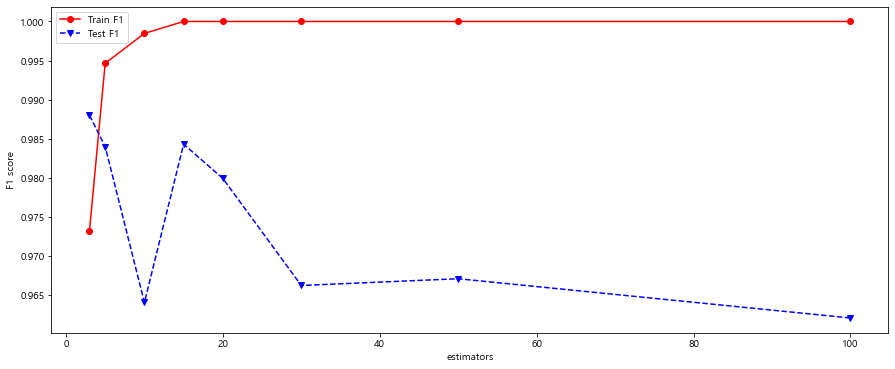

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 3485
recall score 실제 충전소가 맞는 지 맞춘 경우 : 18 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 43653 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 3467 / 47120


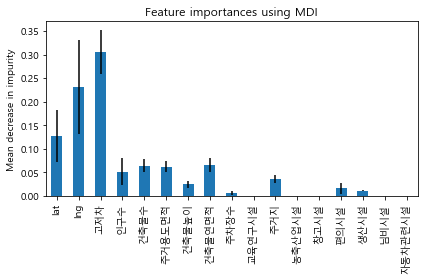

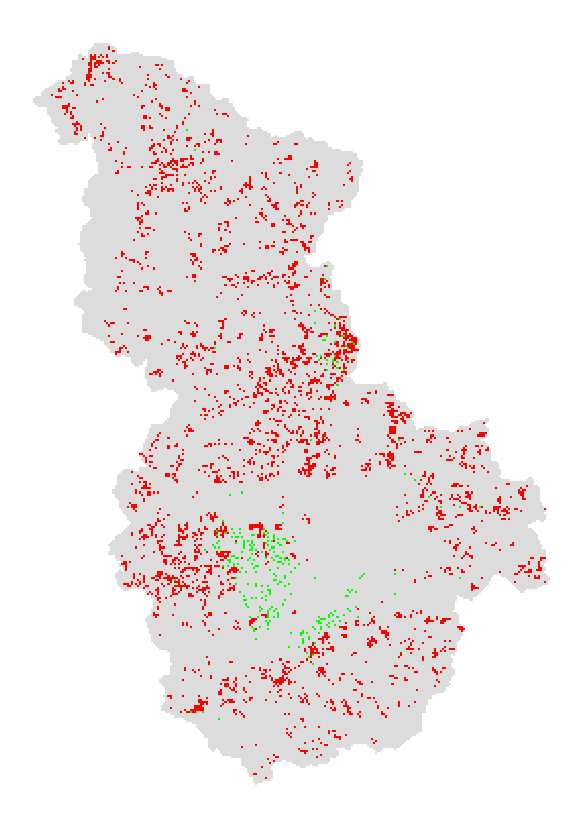

In [90]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

threshold = 0.7
clf, rus_df = RandomForest(dists, train_data, train_target, test_data, test_target, threshold)

#### 인구수, 건축물높이 ==0

In [91]:
DD_cut3 = DD.drop(DD[(DD['인구수']==0) & (DD['주거용도면적']==0)].index)
DD_cut3

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((992800.00000 1826000.00000, 992800.0...",36.432362,127.417591,25.355,77.0,8.0,107.63,10.78,1488.43,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((993300.00000 1822700.00000, 993300.0...",36.402716,127.423134,25.429,286.0,1.0,0.00,0.00,9653.28,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((992800.00000 1827500.00000, 992800.0...",36.445837,127.417591,25.335,81.0,18.0,147.06,7.18,172.82,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,678.61,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,7751.35,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134797,"POLYGON ((1099400.00000 1764400.00000, 1099400...",35.878971,128.599494,28.787,0.0,10.0,151.05,10.31,389.99,1,0,0,0,0,0,0,0,0,0
134805,"POLYGON ((1098200.00000 1764900.00000, 1098200...",35.883463,128.586189,28.750,0.0,0.0,144.15,0.00,0.00,0,0,0,0,0,0,0,0,0,0
134822,"POLYGON ((1097500.00000 1764000.00000, 1097500...",35.875377,128.578428,28.741,0.0,21.0,69.62,8.21,953.78,0,0,0,0,0,0,0,0,0,0
134835,"POLYGON ((1099300.00000 1764000.00000, 1099300...",35.875377,128.598385,28.789,0.0,3.0,46.26,33.00,2618.67,0,0,0,0,0,1,0,0,0,0


In [92]:
train_data = pd.concat([DD_cut3[DD_cut3.columns[1:-1]], DD_cut3[DD_cut3.columns[1:-1]]])
train_target = pd.concat([DD_cut3[DD_cut3.columns[-1]], DD_cut3[DD_cut3.columns[-1]]])

test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]  #sejong_cut


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 3 max_depth= 10 max_features= 16
best_score (test F1 score): 0.9941767237741581



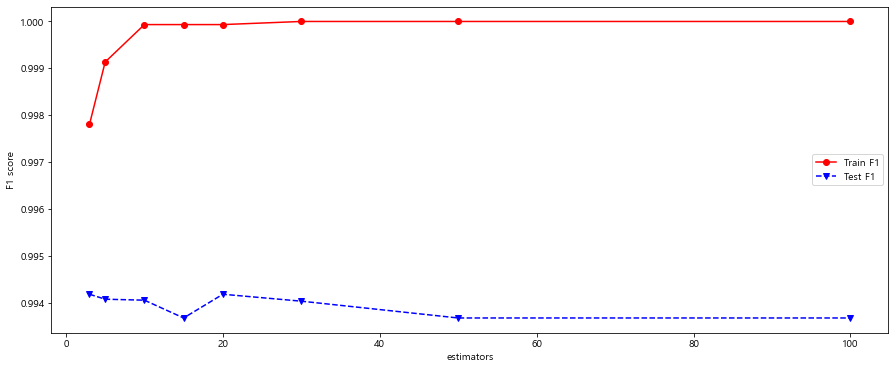

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 28
recall score 실제 충전소가 맞는 지 맞춘 경우 : 0 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 47092 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 28 / 47120


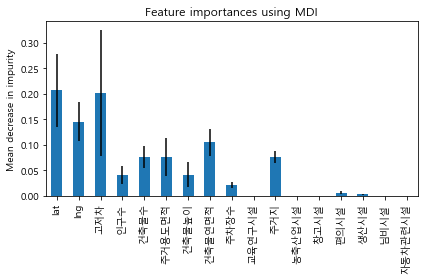

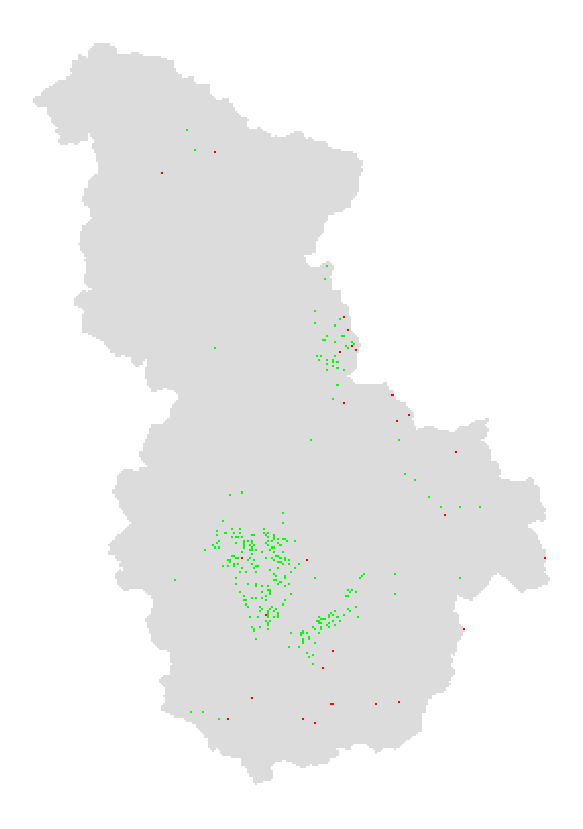

In [93]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

threshold = 0.7
clf, rus_df = RandomForest(dists, train_data, train_target, test_data, test_target, threshold)

#### 인구수, 건축물높이 ==0 / 언더샘플링

In [94]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
train_data, train_target = rus.fit_resample(train_data, train_target)
#train_data = pd.DataFrame(data, columns=data.columns)


best_params (test 성능이 가장 좋은 파라미터) :  n_estimators= 15 max_depth= 50 max_features= 16
best_score (test F1 score): 0.9934382648324753



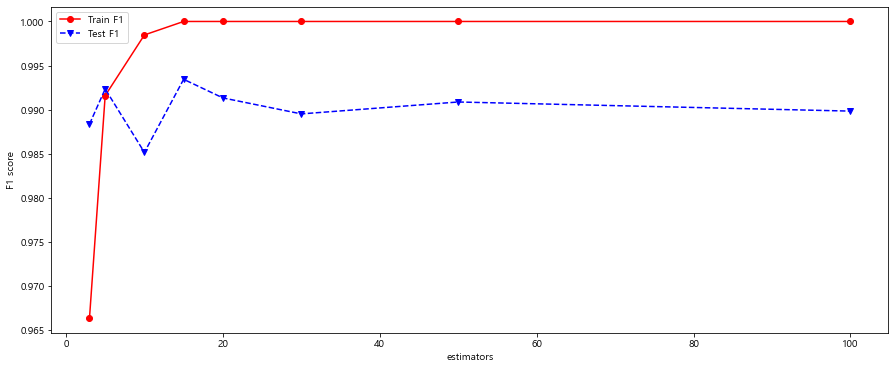

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 559
recall score 실제 충전소가 맞는 지 맞춘 경우 : 8 / 276
precision score 실제 충전소가 없는 곳을 맞춘 경우 : 46569 / 47120
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 551 / 47120


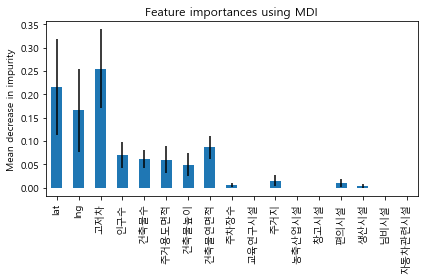

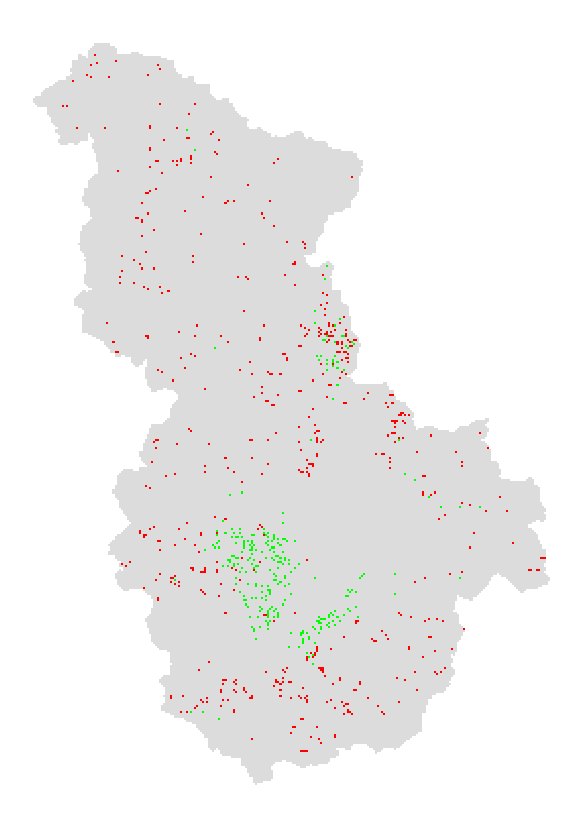

In [95]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [16], 
    'n_estimators' : [10,20,30,50,100,200]
}

threshold = 0.7
clf, rus_df = RandomForest(dists, train_data, train_target, test_data, test_target, threshold)

### 1:2

In [ ]:
######1번:0번 = 1:2 (552곳)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc

train_1 = DD[DD['EV']==1]
train_0= DD[DD['EV']==0]
train_data = train_0.sample(n=552, replace=False, random_state=0).reset_index(drop=True)
data_test = pd.concat([data_test1, data_test0], axis=0)
data_test

data = data_test[data_test.columns[1:-1]]
target = data_test['EV']

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state = 56)

In [ ]:
train_data = pd.concat([DD[DD.columns[1:-1]], DD[DD.columns[1:-1]]])
train_target = pd.concat([DD[DD.columns[-1]], DD[DD.columns[-1]]])

test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]